In [1]:
'''
Calculating and Plotting electric field and potential
'''
import matplotlib.pyplot as plt  
import numpy as np 
from numba import njit


In [258]:
'''
Point charge
'''

'''Particle'''
q = 1
particle_pos = np.array([0.0, 0.0, 0.0])

eps0 = 1

L = 1
N = 10

x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)

rx, ry, rz = np.meshgrid(x, y, z)

Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

V = np.zeros((N,N,N))

In [4]:
@njit
def efield(r, particle_pos, q):
    R = r - particle_pos
    R_norm = np.linalg.norm(R)
    E = q/(4*np.pi*eps0) * (R/R_norm**3)
    
    return E

@njit
def epot(r, particle_pos, q):
    R_norm = np.linalg.norm(r-particle_pos)
    V = q/(4*np.pi*eps0*R_norm)
    return V

In [260]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efield(r, particle_pos, q)
    V.flat[i] = epot(r, particle_pos, q)

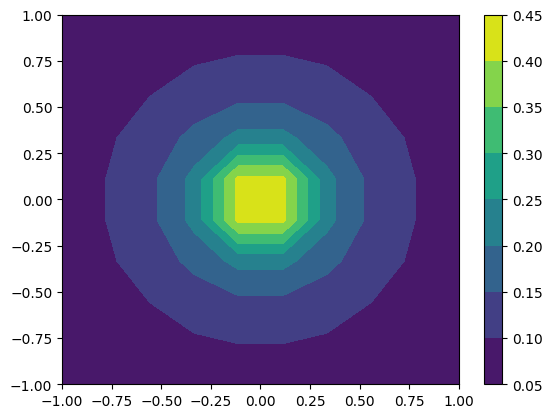

In [261]:
index = int(N/2)
plt.contourf(rx[:,:,index], ry[:,:,index], V[:,:,index])
plt.colorbar()

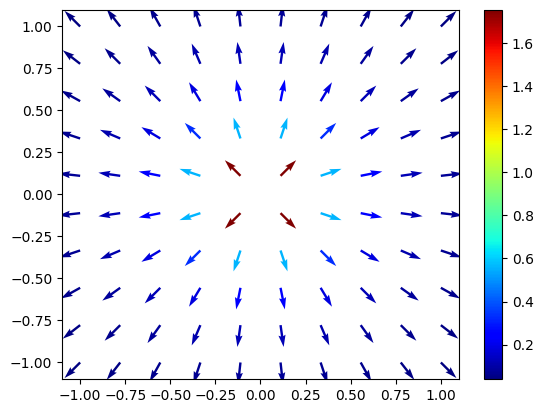

In [262]:
jndex = int(N/2)
Emag = np.sqrt(Ex[:,:,jndex]**2 + Ey[:,:,jndex]**2)
uEx = Ex[:,:,jndex] / Emag
uEy = Ey[:,:,jndex] / Emag
Ecolor = Emag
plt.quiver(rx[:,:,jndex], ry[:,:,jndex], uEx, uEy, Ecolor, cmap='jet')
plt.colorbar()

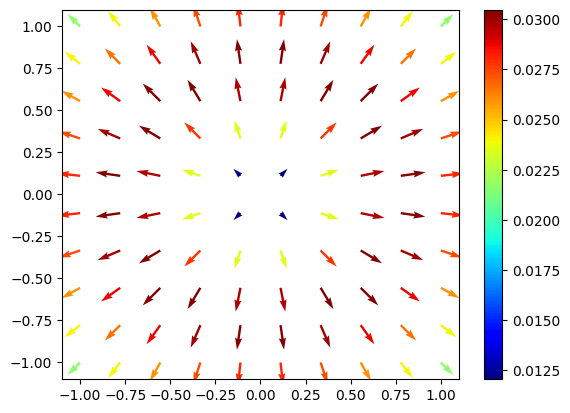

In [263]:
jndex = 0
Emag = np.sqrt(Ex[:,:,jndex]**2 + Ey[:,:,jndex]**2)
uEx = Ex[:,:,jndex] / Emag
uEy = Ey[:,:,jndex] / Emag
Ecolor = Emag
plt.quiver(rx[:,:,jndex], ry[:,:,jndex], Ex[:,:,jndex], Ey[:,:,jndex], Ecolor, cmap = 'jet')
plt.colorbar()


In [59]:
'''
Point charge
'''

'''Particle'''
q1 = 10
particle1_pos = np.array([1.0, 0.0, 0.0])
q2 = -10
particle2_pos = np.array([-1.0, 0.0, 0.0])


eps0 = 1

L = 1.5
N = 100

x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)

rx, ry, rz = np.meshgrid(x, y, z)

Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

V = np.zeros((N,N,N))


In [60]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efield(r, particle1_pos, q1) + efield(r, particle2_pos, q2)
    V.flat[i] = epot(r, particle1_pos, q1) + epot(r, particle2_pos, q2)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

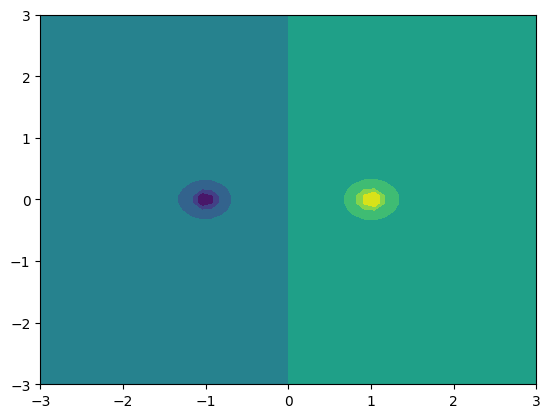

In [10]:
index = int(N/2)
plt.contourf(rx[:,:,index], ry[:,:,index],V[:,:,index])
plt.colorbar()

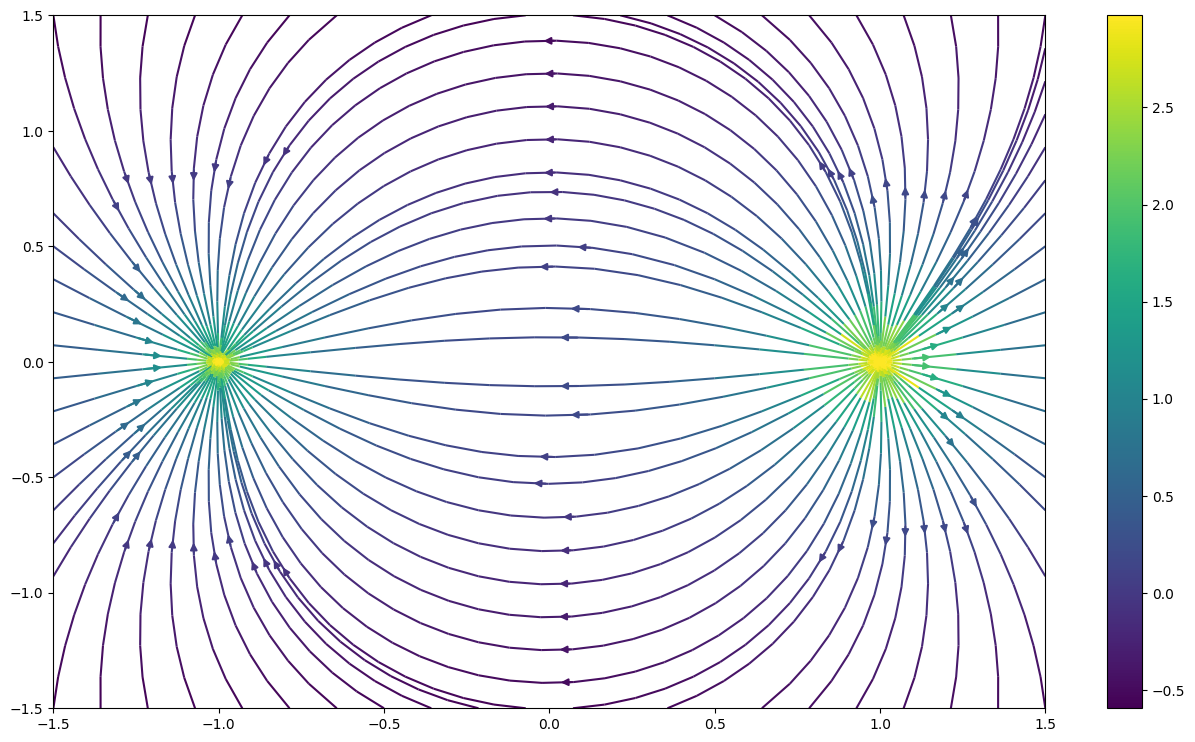

In [68]:
index = int(N/2)
Emag = np.sqrt(Ex[:,:,index]**2 + Ey[:,:,index]**2)
uEx = Ex[:,:,index]/Emag
uEy = Ey[:,:,index]/Emag
Ecolor = np.log10(Emag)
plt.figure(figsize=(16,9))
plt.streamplot(rx[:,:,index], ry[:,:,index], uEx, uEy, broken_streamlines=False, density = .75, color = Ecolor)
plt.colorbar()

In [268]:
q = 2 
line_length = 10

N = 40
L = 10

x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
z = np.linspace(-L, L, N)

rx, ry, rz = np.meshgrid(x,y,z)

Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))
V = np.zeros((N,N,N))

In [269]:
def efieldline(q, line_length, r, N):
    E = 0
    dl = line_length/N
    dq = q/N
    for i in range(N):
        r_q = np.array([-line_length/2 + i*dl ,0.0, 0.0])
        R = r - r_q
        R_norm = np.linalg.norm(R) 
        E += dq/(4*np.pi*eps0) * R/R_norm**3
        
    return E

def epotline(q, line_length, r, N):
    V = 0
    dl = line_length/N
    dq = q/N
    for i in range(N):
        r_q = np.array([-line_length/2 + i*dl, 0.0, 0.0])
        R_norm = np.linalg.norm(r-r_q)
        V += dq/(4*np.pi*eps0*R_norm)
    return V

In [270]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Ex.flat[i], Ey.flat[i], Ez.flat[i] = efieldline(q, line_length, r, 20)
    V.flat[i] = epotline(q, line_length, r, 20)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

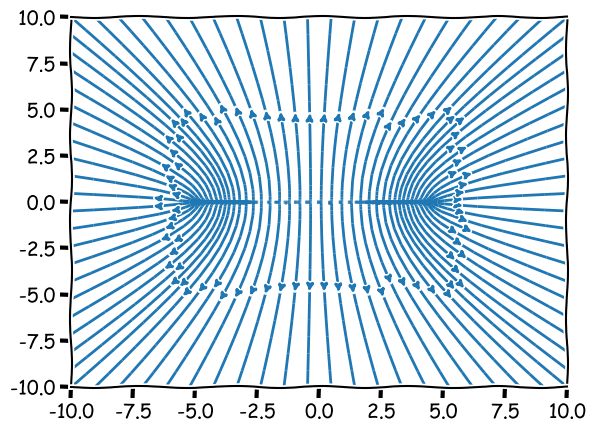

In [271]:
index = int(N/2)
plt.xkcd()
plt.streamplot(rx[:,:,index], ry[:,:,index], Ex[:,:,index], Ey[:,:,index], broken_streamlines = False, density=.75)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

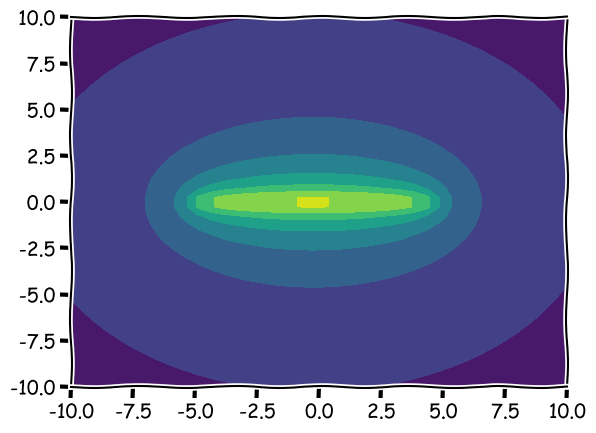

In [272]:
index = int(N/2)
plt.contourf(rx[:,:,index], ry[:,:,index], V[:,:,index])

In [273]:
'''Circle charge'''

q = 5
radius = 3

L = 4
N = 10

x,y = [np.linspace(-L, L, N) for i in range(2)]
rx,ry = np.meshgrid(x, y)
Ex, Ey = np.zeros((2,N,N))



def efieldcircle(r, q, rad, N):
    E = 0
    dq = q/N
    for i in range(N):
        θ = 2*np.pi/N * i
        r_q = rad * np.array([np.cos(θ), np.sin(θ), 0.0])
        R = r - r_q
        R_norm = np.linalg.norm(R)
        E += dq/(4*np.pi*eps0) * R/R_norm**3
    
    return E

In [274]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0.0]) 
    Ex.flat[i], Ey.flat[i], Ez = efieldcircle(r, q, radius, 100)

(-4.0, 4.0, -4.0, 4.0)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

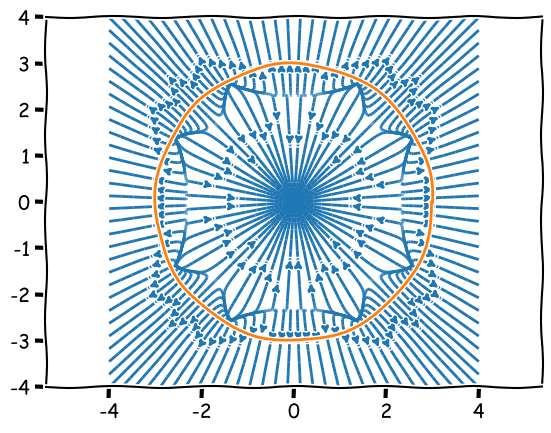

In [275]:
index = int(N/2)
plt.streamplot(rx, ry, Ex, Ey, broken_streamlines=False)
t = np.linspace(0, 2*np.pi, 100)
c = radius * np.array([np.cos(t), np.sin(t)])
plt.plot(c[0], c[1])
plt.axis('equal')

(-4.4, 4.4, -4.4, 4.4)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

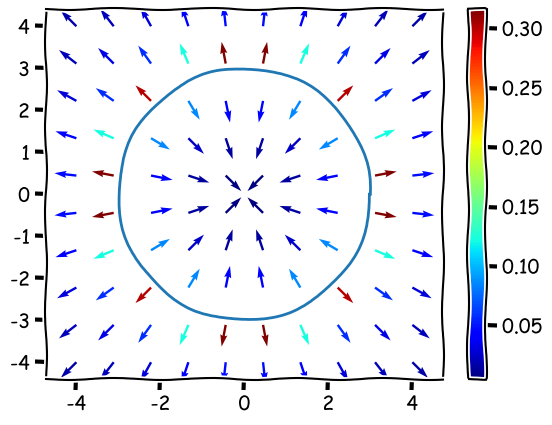

In [276]:
index = int(N/2)
Emag = np.sqrt(Ex**2 + Ey**2)
uEx = Ex/Emag
uEy = Ey/Emag  
Ecolor = Emag
plt.quiver(rx, ry, uEx, uEy, Ecolor, cmap = 'jet')
plt.colorbar()
t = np.linspace(0, 2*np.pi, 100)
c = radius * np.array([np.cos(t), np.sin(t)])
plt.plot(c[0], c[1])

plt.axis('equal')

In [277]:
plt.xkcd(False)

In [278]:
'''Magnetic field'''
I = 1
line_length = 2
μ04pi = 1
L = 5
N = 20

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x,y,z)
Bx, By, Bz = np.zeros((3,N,N,N))


In [279]:

def Bfield_line(r, line_length, I, N):
    B = np.zeros(3)
    line_segment = line_length/N
    dl = line_segment * np.array([1, 0.0, 0.0])
    for i in range(N):
        di = np.array([-line_length/2 + line_segment*i, 0.0, 0.0])
        R = r - di
        R_norm = np.linalg.norm(R)
        B += μ04pi* I/R_norm**3 * np.cross(dl, R)
    
    return B

In [280]:
for i in range(0,N**3):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Bx.flat[i], By.flat[i], Bz.flat[i] = Bfield_line(r, line_length, I, 10)

(20, 20, 20) (20, 20, 20) (20, 20, 20)
(20, 20, 20) (20, 20, 20) (20, 20, 20)


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

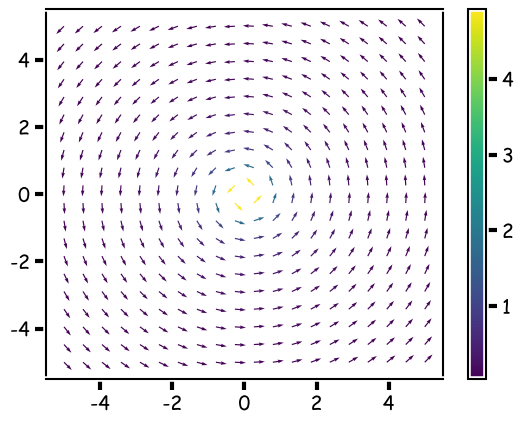

In [281]:
index = int(N/2)
print(rx.shape, ry.shape, rz.shape)
print(Bx.shape, By.shape, Bz.shape)

Bmag = np.sqrt(By[:,index,:]**2 + Bz[:,index,:]**2)
uBy = By[:,index,:]/Bmag
uBz = Bz[:,index,:]/Bmag
Bcolor = Bmag
for i in range(len(rx)):
    if (rz[i].all() != ry[i].all()):
        print(False)

plt.quiver(ry[:,index,:], rz[:,index,:], uBy, uBz, Bcolor)
plt.colorbar()

ValueError: The rows of 'x' must be equal

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

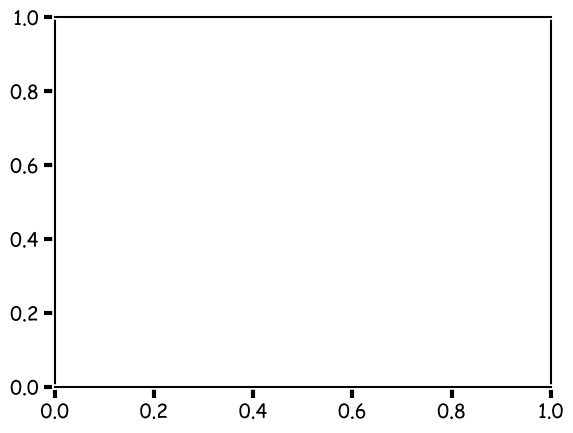

In [282]:
plt.streamplot(ry[:,:,index], rz[:,:,index], By[:,:,index], Bz[:,:,index])

In [ ]:
'''Magnetic field'''
I = 1
line_length = 2
μ04pi = 1
L = 5
N = 8

y, z = [np.linspace(-L, L, N) for i in range(2)]
ry, rz = np.meshgrid(y,z)
By, Bz = np.zeros((2,N,N))


In [ ]:
for i in range(len(rz.flat)):
    r = np.array([0, ry.flat[i], rz.flat[i]])
    Bx, By.flat[i], Bz.flat[i] = Bfield_line(r, line_length, I, 10)

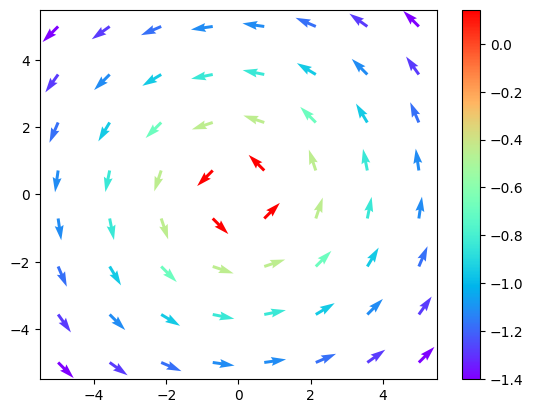

In [ ]:
# plt.streamplot(ry, rz, By, Bz, broken_streamlines=False, density=.5)
Bmag = np.sqrt(By**2 + Bz**2)
uBy = By/Bmag
uBz = Bz/Bmag
Bcolor = np.log10(Bmag)
plt.quiver(ry, rz, uBy, uBz, Bcolor, cmap = 'rainbow')
plt.colorbar()

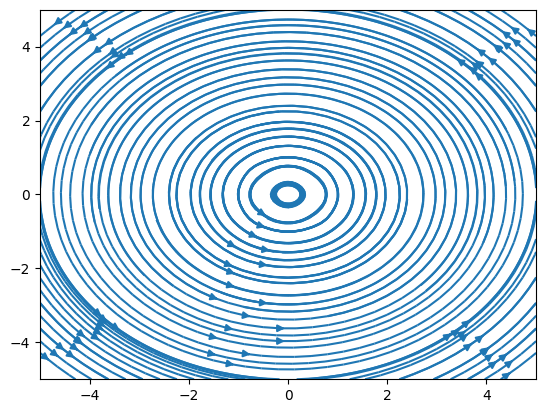

In [ ]:
plt.streamplot(ry, rz, By, Bz, broken_streamlines=False)

In [ ]:
'''Magnetic field from circular wire'''

I = 5
rad = 5
L = 8
N = 40

x, z = [np.linspace(-L, L, N) for i in range(2)]
rx, rz = np.meshgrid(x, z)
Bx, Bz = np.zeros((2,N,N))

def BfieldCircle(r, rad, I, N):
    dθ = 2*np.pi/N 
    dl = rad*2*np.pi/N
    B = np.zeros(3)
    for i in range(N):
        current_pos = rad*np.array([np.cos(dθ*i), np.sin(dθ*i), 0])
        Idl         = I*dl*np.array([-np.sin(dθ*i), np.cos(dθ*i), 0])
        R           = r - current_pos
        R_norm      = np.linalg.norm(R)
        B          += np.cross(Idl, R)/R_norm**3
    return B

In [ ]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Bx.flat[i], By, Bz.flat[i] = BfieldCircle(r, rad, I, 20)

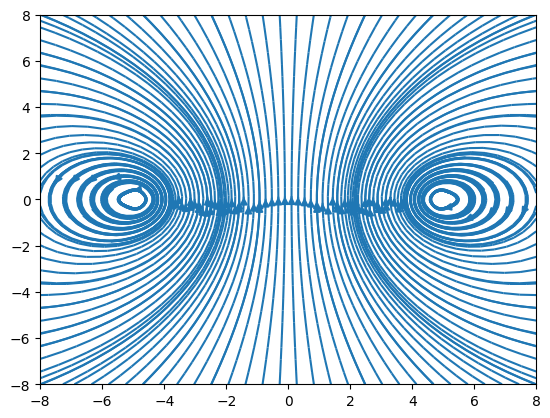

In [ ]:
plt.streamplot(rx, rz, Bx, Bz, broken_streamlines=False)